# Load libraries

In [1]:
import numpy as np
import tensorflow as tf
from abc import ABC, abstractmethod
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Random Forest

In [2]:
# Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data to 2D (Flatten each image from 28x28 to a 784-pixel vector)
X_train = x_train.reshape(x_train.shape[0], -1)
X_test = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values to [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
print("\nTraining")
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)

# Select a sample for prediction
sample_indices = np.random.choice(len(X_test), size=20, replace=False)  # Randomly select 10 test samples
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

predictions = rf_classifier.predict(sample_images)

# Display predictions along with actual labels
print("\nPredictions:")
for i, pred in enumerate(predictions):
    print(f"Sample {i}: Expected Label: {sample_labels[i]}, Predicted Label: {pred}")



Training

Model Accuracy: 0.9704

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Predictions:
Sample 0: Expected Label: 3, Predicted Label: 3
Sample 1: Expected Label: 2, Predicted Label: 2
Sample 2: Expected Label: 3, Predicted Label: 3
Sample 3: Expected Label

# Feed-Forward Neural Network

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8562 - loss: 0.5084 - val_accuracy: 0.9532 - val_loss: 0.1630
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9554 - loss: 0.1531 - val_accuracy: 0.9613 - val_loss: 0.1245
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9677 - loss: 0.1089 - val_accuracy: 0.9689 - val_loss: 0.1015
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9760 - loss: 0.0816 - val_accuracy: 0.9711 - val_loss: 0.0922
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9807 - loss: 0.0636 - val_accuracy: 0.9742 - val_loss: 0.0856
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9836 - loss: 0.0537 - val_accuracy: 0.9748 - val_loss: 0.0850
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9869 - loss: 0.0439 - val_accuracy: 0.9772 - val_loss: 0.0810
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9888 - loss: 0.0362 - 

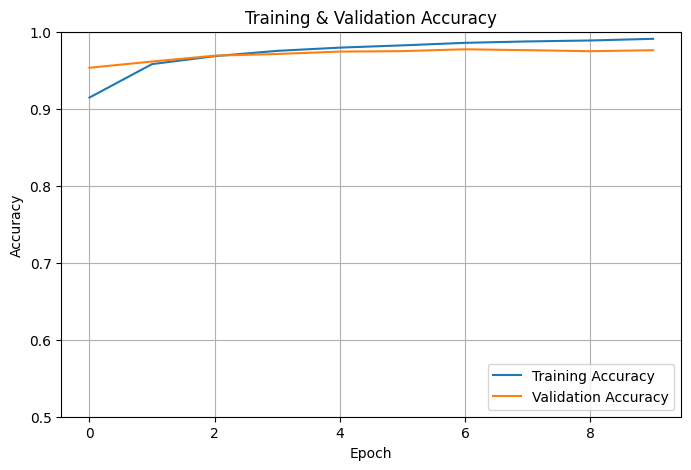

313/313 - 1s - 2ms/step - accuracy: 0.9760 - loss: 0.0792

Final Test Accuracy: 0.9760

Predictions:
Sample 0: Expected Label: 7, Predicted Label: 7
Sample 1: Expected Label: 2, Predicted Label: 2
Sample 2: Expected Label: 1, Predicted Label: 1
Sample 3: Expected Label: 0, Predicted Label: 0
Sample 4: Expected Label: 4, Predicted Label: 4
Sample 5: Expected Label: 1, Predicted Label: 1
Sample 6: Expected Label: 4, Predicted Label: 4
Sample 7: Expected Label: 9, Predicted Label: 9
Sample 8: Expected Label: 5, Predicted Label: 5
Sample 9: Expected Label: 9, Predicted Label: 9


In [3]:

# Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to fit CNN input format (adding channel dimension for grayscale images)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


# Build the FNN model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)), 
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
print(history.history.keys())

# Plot training & validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')
plt.grid(True)
plt.show()

# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"\nFinal Test Accuracy: {test_acc:.4f}")
# Make predictions on the first 10 test samples
predictions = model.predict(x_test[:10], verbose=0)

# Display predictions along with actual labels
print("\nPredictions:")
for i, pred in enumerate(predictions):
    predicted_label = np.argmax(pred)  # Get the predicted class
    actual_label = y_test[i]
    print(f"Sample {i}: Expected Label: {actual_label}, Predicted Label: {predicted_label}")


# Convolutional Neural Network

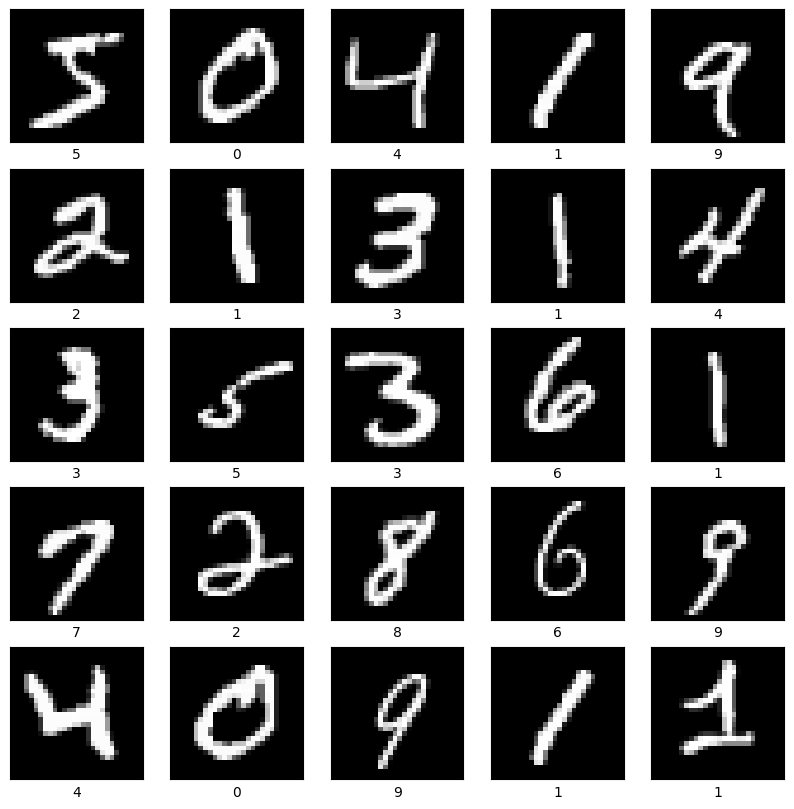

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.8932 - loss: 0.3413 - val_accuracy: 0.9836 - val_loss: 0.0518
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9847 - loss: 0.0485 - val_accuracy: 0.9884 - val_loss: 0.0351
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9901 - loss: 0.0319 - val_accuracy: 0.9901 - val_loss: 0.0321
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9927 - loss: 0.0242 - val_accuracy: 0.9918 - val_loss: 0.0265
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9936 - loss: 0.0193 - val_accuracy: 0.9905 - val_loss: 0.0283
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9958 - loss: 0.0132 - val_accuracy: 0.9924 - val_loss: 0.0279
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9960 - loss: 0.0116 - val_accuracy: 0.9914 - val_loss: 0.0267
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9970 - lo

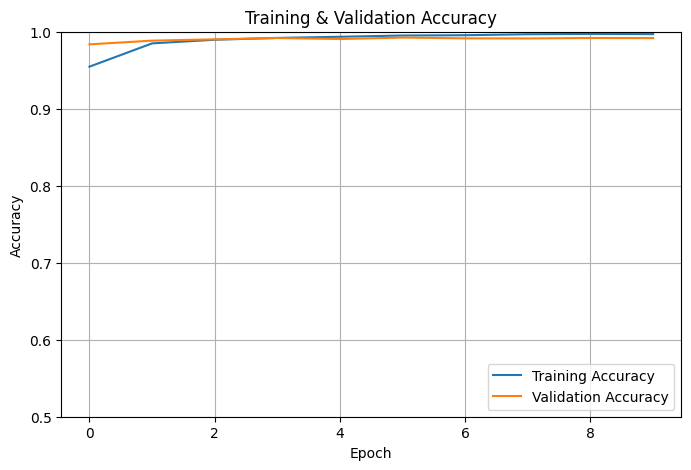

313/313 - 1s - 4ms/step - accuracy: 0.9917 - loss: 0.0341

Final Test Accuracy: 0.9917

Predictions:
Sample 0: Expected Label: 7, Predicted Label: 0
Sample 1: Expected Label: 2, Predicted Label: 6
Sample 2: Expected Label: 1, Predicted Label: 9
Sample 3: Expected Label: 0, Predicted Label: 0
Sample 4: Expected Label: 4, Predicted Label: 1
Sample 5: Expected Label: 1, Predicted Label: 5
Sample 6: Expected Label: 4, Predicted Label: 9
Sample 7: Expected Label: 9, Predicted Label: 7
Sample 8: Expected Label: 5, Predicted Label: 3
Sample 9: Expected Label: 9, Predicted Label: 4


In [4]:
# Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to fit CNN (add channel dimension for grayscale images)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Plot first 25 images from training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # Ensure correct shape
    plt.xlabel(y_train[i])  # Correct label formatting
plt.show()

# Define CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First Conv Layer
    layers.MaxPooling2D((2, 2)),  # Max Pooling
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second Conv Layer
    layers.MaxPooling2D((2, 2)),  # Max Pooling
    layers.Conv2D(64, (3, 3), activation='relu'),  # Third Conv Layer
    layers.Flatten(),  # Flatten the feature maps
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Show Model Summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot training & validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')
plt.grid(True)
plt.show()

# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"\nFinal Test Accuracy: {test_acc:.4f}")
# Make predictions on the first 10 test samples
predictions = model.predict(x_test, verbose=0)

# Display predictions along with actual labels
print("\nPredictions:")
for i, pred in enumerate(predictions[10:20]):
    predicted_label = np.argmax(pred)  # Get the predicted class
    actual_label = y_test[i]
    print(f"Sample {i}: Expected Label: {actual_label}, Predicted Label: {predicted_label}")

